In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Masking, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

C:\Users\admin\anaconda3\envs\sample\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\anaconda3\envs\sample\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\anaconda3\envs\sample\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\anaconda3\envs\sample\lib\site-packages\tensorflow\pyth

In [5]:

df = pd.read_csv("C:/Users/admin/LSTM0.csv",header=None,
                 usecols=[1, 2, 3, 4, 5, 6
                        ])
df

,1,2,3,4,5,6
0,52.8,57.9,51.7,50.8,50.6,51.0
1,46.5,63.9,57.3,61.4,66.2,67.0
2,66.8,61.9,63.9,65.1,64.9,62.3
3,73.9,72.6,76.2,73.8,81.2,80.8
4,69.4,63.4,62.4,58.7,70.9,73.5
5,63.0,69.4,64.1,59.4,55.4,64.9
6,77.1,84.5,98.0,99.9,92.8,79.9
7,79.4,77.9,75.4,75.1,74.7,76.5
8,63.4,68.4,56.6,61.6,61.4,60.2
9,62.6,68.7,60.0,59.8,58.0,61.0


In [6]:
number = df.shape[0]
time_unit = df.shape[1] - 1
train_size=500

In [7]:


values = df.values
train_x = values[:train_size, :-1]
train_x = train_x.reshape(-1, 1)
train_x = train_x.reshape(train_size, time_unit, 1)


ValueError: cannot reshape array of size 50 into shape (500,5,1)

In [10]:
test_x = values[train_size:, :-1]
test_x = test_x.reshape(-1, 1)
test_x = test_x.reshape(number-train_size, time_unit, 1)

In [11]:
scaler = preprocessing.StandardScaler()
train_y = values[:train_size, -1]
train_y = train_y.reshape(-1, 1)
train_y = scaler.fit_transform(train_y)
train_y = train_y.reshape(-1, )

In [12]:
test_y = values[train_size:, -1]
test_y = test_y.reshape(-1, 1)
test_y = scaler.fit_transform(test_y)
test_y = test_y.reshape(-1, )

In [14]:
model = Sequential()
model.add(LSTM(256,input_shape=(time_unit,1),return_sequences=False))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer=Adam())
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [15]:
result = model.fit(train_x,
                   train_y,
                   batch_size=128,
                   epochs=10,
                   validation_data=(test_x, test_y))



Train on 500 samples, validate on 271 samples
Epoch 1/10
500/500 [==============================] - 0s 900us/step - loss: 1.2559 - val_loss: 1.0078
Epoch 2/10
500/500 [==============================] - 0s 242us/step - loss: 0.9110 - val_loss: 0.6749
Epoch 3/10
500/500 [==============================] - 0s 238us/step - loss: 0.6092 - val_loss: 0.4954
Epoch 4/10
500/500 [==============================] - 0s 226us/step - loss: 0.4280 - val_loss: 0.3071
Epoch 5/10
500/500 [==============================] - 0s 234us/step - loss: 0.3429 - val_loss: 0.2721
Epoch 6/10
500/500 [==============================] - 0s 270us/step - loss: 0.2933 - val_loss: 0.2309
Epoch 7/10
500/500 [==============================] - 0s 283us/step - loss: 0.2632 - val_loss: 0.2202
Epoch 8/10
500/500 [==============================] - 0s 300us/step - loss: 0.2441 - val_loss: 0.2026
Epoch 9/10
500/500 [==============================] - 0s 289us/step - loss: 0.2251 - val_loss: 0.1801
Epoch 10/10
500/500 [==============

In [16]:
model.save_weights('LSTM.hdf5')

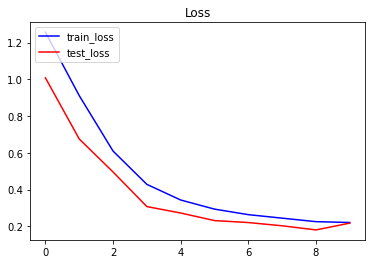

In [17]:
plt.plot(result.history['loss'],'blue', label='Training')
plt.plot(result.history['val_loss'],'red', label='Test')
plt.title('Loss')
plt.legend(['train_loss','test_loss'], loc='upper left')
plt.show()

In [18]:
import math
import openpyxl 
wb = openpyxl.load_workbook("LSTM.xlsx")
ws = wb.active
point=10

In [19]:
#R1
train_R1=model.predict(train_x)
train_R1=scaler.inverse_transform(train_R1)
train_R1=train_R1.reshape(-1,1)


In [20]:
test_R1=model.predict(test_x)
test_R1=scaler.inverse_transform(test_R1)
test_R1=test_R1.reshape(-1,1)


In [21]:
for i in range(train_size):
    R1=math.ceil(train_R1[i]*point)
    ws.cell(column=8,row=1,value="Predicted_R1")
    ws.cell(column=8,row=i+2,value=R1/point)

In [22]:
for i in range(number-train_size):
    R1=math.ceil(test_R1[i]*point)
    ws.cell(column=8,row=1,value="Predicted_R1")
    ws.cell(column=8,row=i+2+train_size,value=R1/point)

In [23]:
wb.save("LSTM.xlsx")